In [4]:
#kmeans
import numpy as np
import math as mp
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score,pairwise_distances_argmin

In [12]:
class Kmeans:
    
    def __init__(self,k=3,x_train=None,visual_cent=None,visual_label=None):
        self.k=k
        self.x_train = x_train
        self.visual_cent=visual_cent
        self.visual_label=visual_label
    
    def initial_centroid(self,k,x_train):
        rnd=np.random.RandomState(6)
        index=rnd.permutation(x_train.shape[0])[:k]
        centroid=x_train[index]
        return centroid
   
    def centroid_check(self,old_cent,new_cent):
        if np.all(old_cent==new_cent):
            return True
            
    def calculate_new(self,x_train,labels):
        self.labels=labels
        new_cent = np.array([x_train[labels==i].mean(0) for i in range(self.k)])
        return new_cent
    
    def labels_allot(self,x_train,centroid):
        self.labels = pairwise_distances_argmin(x_train,centroid)
        return self.labels
    
    def fit(self,x_train):
        x_train=x_train.to_numpy()
        self.x_train = x_train
        
        visual_cent = []
        visual_label = []
        

        centroid = self.initial_centroid(self.k,x_train)
        visual_cent.append(centroid)
        
        labels = self.labels_allot(x_train,centroid)
        visual_label.append(labels)
        
        i=0
        while (i<100):
            new_cent = self.calculate_new(x_train,labels)
            labels = self.labels_allot(x_train,new_cent)
            
            visual_cent.append(new_cent)
            visual_label.append(labels)
            
            if self.centroid_check(centroid,new_cent):
                break
            else:
                centroid = new_cent    
                i+=1
        
        self.visual = visual_cent
        self.visual_lab = visual_label       
               

    
    def visualization(self):
        
        x_train = self.x_train
        labels=np.array(self.visual_lab)
        centroid=np.array(self.visual)
        
        print("initial centroids : ")
        print(centroid[0])
        plt.title("Initial Centoids")
        sns.scatterplot(x=x_train[:,0],y=x_train[:,1],hue=labels[0])
        sns.scatterplot(x=centroid[0][:,0], y=centroid[0][:,1],marker="*",color='b',s=200)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
        
        for i in range(1,len(centroid)):
                print("updated centroids : ")
                print(centroid[i])
                plt.title("Centoids after {} iteration".format(i))
                
                sns.scatterplot(x=x_train[:,0],y=x_train[:,1],hue=labels[i])
                sns.scatterplot(x=centroid[i][:,0], y=centroid[i][:,1],marker="*",color='b',s=200)
                plt.xlabel('Feature 1')
                plt.ylabel('Feature 2')
                plt.legend()
                plt.show()
        
        

In [13]:
x,y=datasets.make_blobs(n_samples=500, centers=None, n_features=2,random_state=0)

In [14]:
df=pd.DataFrame(x,columns=["Feature1","Feature2"])
data=df.copy()
data["Target"]=y
data[["Feature1","Feature2"]]

,Feature1,Feature2
0,1.103182,4.705777
1,-1.932846,3.642251
2,-2.034422,1.866002
3,1.616402,2.686831
4,-0.960010,4.492566
...,...,...
495,2.660388,1.793220
496,2.875589,2.257612
497,2.826673,1.927102
498,-0.094483,5.358239


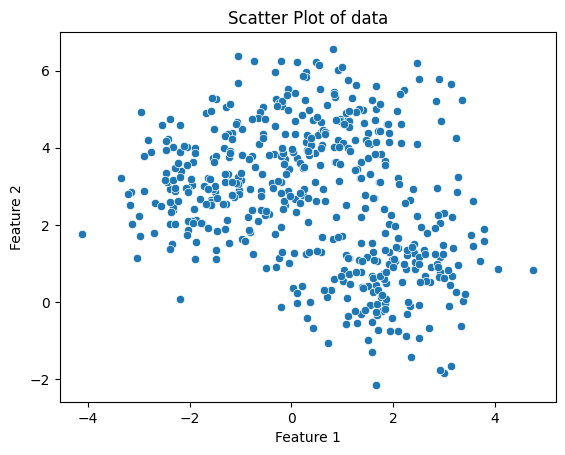

In [15]:
plt.title("Scatter Plot of data")
sns.scatterplot(x=x[:,0],y=x[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [16]:
km=Kmeans(k=3)

In [17]:
km.fit(data[["Feature1","Feature2"]])

initial centroids : 
[[-0.80380352  2.94249439]
 [-2.45969305  4.16120165]
 [ 2.84382904  5.20983199]]


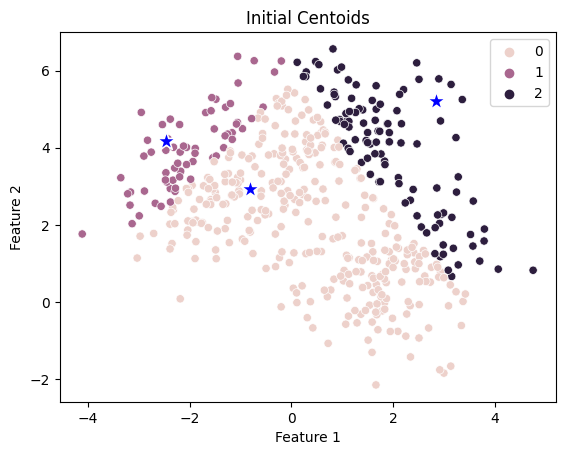

updated centroids : 
[[ 0.4069391   2.01473225]
 [-2.01222484  3.97490845]
 [ 1.99240945  3.93243527]]


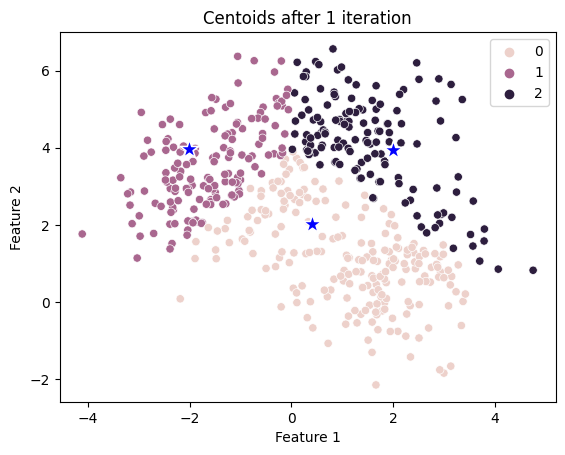

updated centroids : 
[[ 1.13490183  1.12164322]
 [-1.61262914  3.53677462]
 [ 1.54776198  4.11661189]]


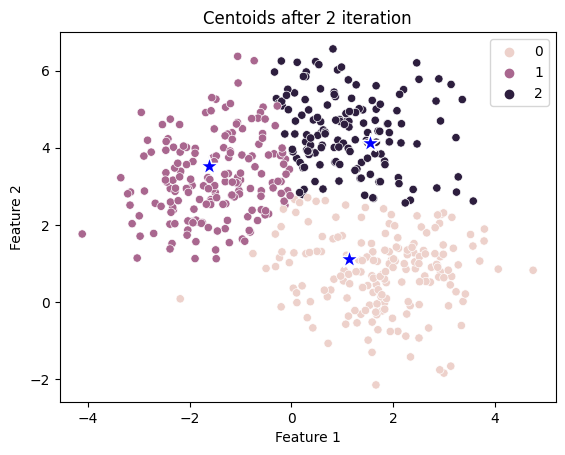

updated centroids : 
[[ 1.75520173  0.7882726 ]
 [-1.50911484  3.19831645]
 [ 1.13122764  4.40260245]]


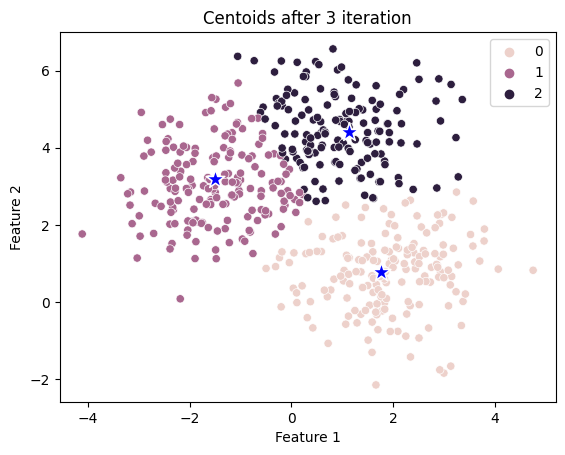

updated centroids : 
[[ 1.90259787  0.74913075]
 [-1.49984755  3.03888503]
 [ 0.98153364  4.46425857]]


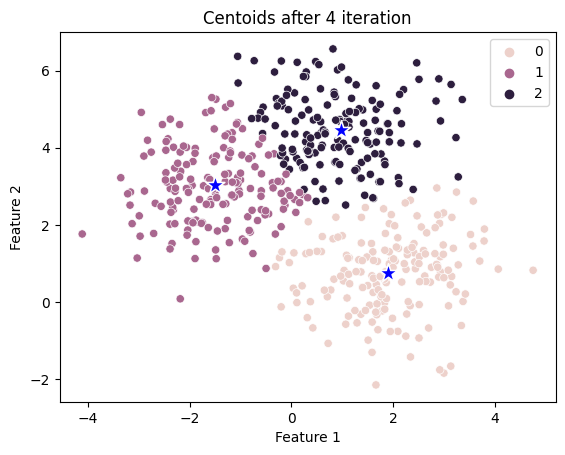

updated centroids : 
[[ 1.92696394  0.75099557]
 [-1.52472084  2.97061358]
 [ 0.90907574  4.4670649 ]]


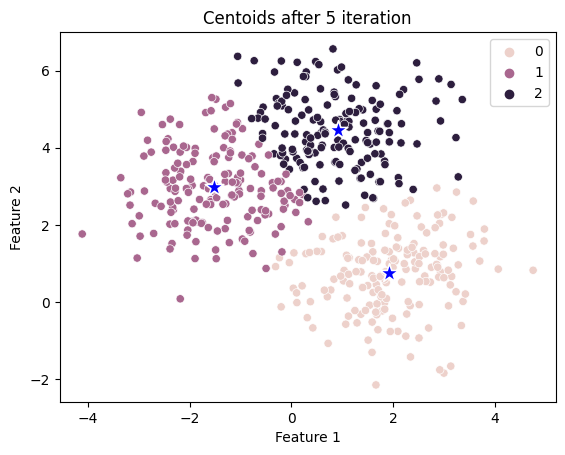

updated centroids : 
[[ 1.94876166  0.73995113]
 [-1.5294146   2.9443254 ]
 [ 0.88851433  4.45086408]]


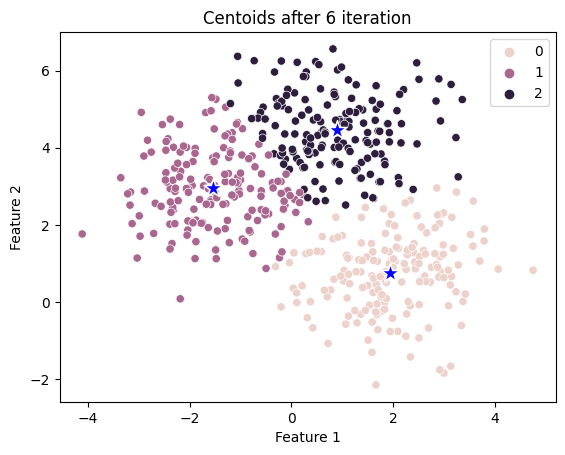

updated centroids : 
[[ 1.96167358  0.73752985]
 [-1.52371332  2.92068825]
 [ 0.87564159  4.45514163]]


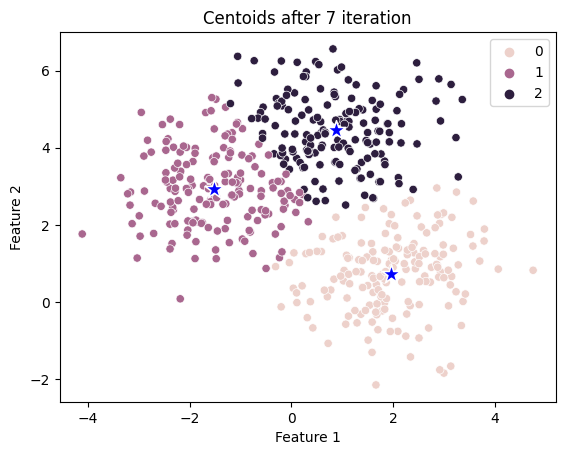

updated centroids : 
[[ 1.96167358  0.73752985]
 [-1.52371332  2.92068825]
 [ 0.87564159  4.45514163]]


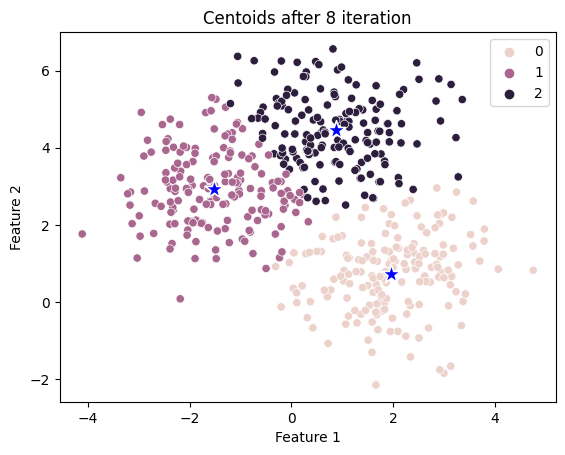

In [18]:
km.visualization()